<a href="https://colab.research.google.com/github/TheTalesman/ml-notebooks/blob/main/classifica%C3%A7%C3%A3o%2C_DTREE%2C_RANDOM_FOREST%2C_KNN%2C_SVM%2C_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dados_completos = pd.read_csv('winequality-red.csv',sep=";")
dados_completos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dados_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
dados_completos['residual sugar'].isnull().sum()

0

In [ ]:
dados_completos['fixed acidity'].std()

1.7410963181277006

In [ ]:
dados_completos['residual sugar'].median()

2.2

In [ ]:
np.corrcoef(dados_completos['fixed acidity'], dados_completos['pH'])[0, 1]

-0.6829781945685316

In [ ]:
np.corrcoef(dados_completos['alcohol'], dados_completos['quality'])[0, 1]

0.47616632400113584

In [ ]:
dados_completos['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
dataset=dados_completos['fixed acidity'].values
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset.reshape(-1,1))
print(dataset.min())

0.0


**KNN**


In [ ]:
#importando as bibliotecas 
import pylab as pl # utilizado para plotar os gráficos
from sklearn import neighbors, datasets


In [ ]:
dados_completos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = dados_completos.iloc[:,:-1].values
y = dados_completos.iloc[:,11].values
print(X)

NameError: ignored

In [ ]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)# divide 20% para teste

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  #objeto que normaliza os dados
scaler.fit(X_train)  #realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#treina o modelo 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[  0   0   0   0   0   0]
 [  0   2   9   5   0   0]
 [  0   3 146  55   1   0]
 [  1   0  57 113  17   0]
 [  0   0  14  23  28   0]
 [  0   0   1   4   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.40      0.12      0.19        16
           5       0.64      0.71      0.68       205
           6       0.56      0.60      0.58       188
           7       0.60      0.43      0.50        65
           8       0.00      0.00      0.00         6

    accuracy                           0.60       480
   macro avg       0.37      0.31      0.32       480
weighted avg       0.59      0.60      0.59       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


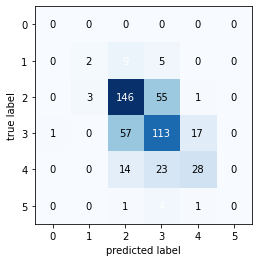

In [ ]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.11      0.12      0.11        16
           5       0.69      0.69      0.69       205
           6       0.54      0.55      0.55       188
           7       0.61      0.52      0.56        65
           8       0.00      0.00      0.00         6

    accuracy                           0.58       480
   macro avg       0.32      0.31      0.32       480
weighted avg       0.59      0.58      0.59       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


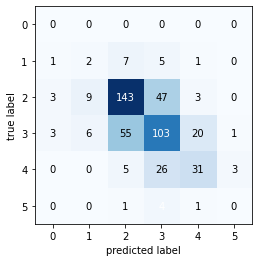

In [ ]:
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

RANDOM FOREST

In [ ]:
from sklearn.ensemble import  RandomForestClassifier # importa o classificador árvore de decisão
# Cria o objeto de classificação através do 
clf = RandomForestClassifier(max_depth=10, random_state=1)

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.74      0.76      0.75       205
           6       0.56      0.70      0.62       188
           7       0.66      0.35      0.46        65
           8       0.00      0.00      0.00         6

    accuracy                           0.65       480
   macro avg       0.39      0.36      0.37       480
weighted avg       0.62      0.65      0.63       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM

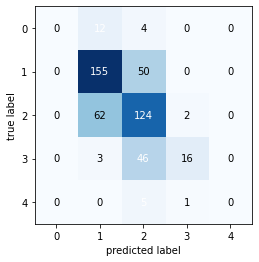

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.67      0.76      0.71       205
           6       0.54      0.66      0.59       188
           7       0.84      0.25      0.38        65
           8       0.00      0.00      0.00         6

    accuracy                           0.61       480
   macro avg       0.41      0.33      0.34       480
weighted avg       0.61      0.61      0.59       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto',kernel='rbf') 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()
print(classification_report(y_test, y_pred))

MLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


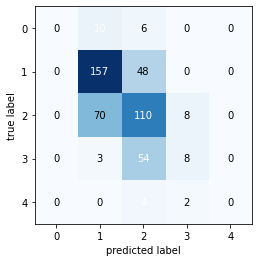

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.65      0.77      0.71       205
           6       0.50      0.59      0.54       188
           7       0.44      0.12      0.19        65
           8       0.00      0.00      0.00         6

    accuracy                           0.57       480
   macro avg       0.32      0.29      0.29       480
weighted avg       0.53      0.57      0.54       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()
print(classification_report(y_test, y_pred))

DISCRETIZAÇÃO

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
A1_dis = KBinsDiscretizer(n_bins=2, encode='ordinal',
                           strategy = "kmeans").fit_transform(dados_completos[['quality']])

In [ ]:
dados_completos['quality']=A1_dis
dados_completos.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,1.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,0.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0.0,0.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0.0,0.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1.0,1.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1.0,1.0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0.0,0.0


In [ ]:
X = dados_completos.iloc[:,:-2].values
y = dados_completos.iloc[:,11].values
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)# divide 20% para teste
scaler = StandardScaler()  #objeto que normaliza os dados
scaler.fit(X_train)  #realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = RandomForestClassifier(max_depth=10, random_state=1)

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

[0. 0. 0. ... 1. 0. 1.]
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       230
         1.0       0.83      0.82      0.82       250

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480

